In [2]:
# Sphere-Plane NN model
## https://www.adeveloperdiary.com/data-science/machine-learning/understand-and-implement-the-backpropagation-algorithm-from-scratch-in-python/

import matplotlib.pyplot as plt 
from math import exp
from math import sqrt

from random import seed
from random import random
from random import randint
import matplotlib.lines as lines 

import math
 
# Initialize a network


class neuron_s():
    
    def __init__(self, n_inputs,c,o):
        self.mode = "C"
        self.outlayer = o
        self.inputs = [0 for _ in range(n_inputs)]
        self.weights = [random() for _ in range(n_inputs)]

        self.delta = 0
        self.output = 0
        self.R = .1 + 0.6*random()
        self.C = c
        self.al = 0.1
        
        self.dw = [0 for _ in range(len(self.weights))]
        self.dR = 0
        
    def copy (self):
        new_neuron = neuron_s(len(self.inputs), self.C, self.outlayer)
        new_neuron.inputs = self.inputs.copy()
        new_neuron.weights = self.weights.copy()
        new_neuron.delta = self.delta
        new_neuron.output = self.output
        new_neuron.R = self.R
        return new_neuron
    
    def activate(self):
        N = len(self.weights)
        y1 = sum([self.inputs[i]* self.inputs[i] for i in range(N) ])
        y2 = sum([self.inputs[i]* self.weights[i] for i in range(N) ])
        y3 = sum([self.weights[i]* self.weights[i] for i in range(N) ])
 
        activation = 1 - (y3 -  2*y2 + y1 )/(self.R**2)
        return activation
        
    def transfer_l(self,activation):
        self.output = activation
        return self.output
    
    def transfer_derivative_l(self):
        return 1
    
    def transfer(self,activation):
        
        if  -self.al*activation > 100:
            self.output = 0
        else:
            self.output = 1.0 / (1.0 + exp(-self.al*activation)) 
        return self.output
    
    def transfer_derivative(self):
        return self.al*self.output * (1.0 - self.output)

    # Calculate the derivative of the activation function
    def activation_derivate_by_input(self, idx):
        return 2*(self.weights[idx]-self.inputs[idx])/(self.R**2)

    def activation_derivate_by_weight(self, idx):
        return 2*(-self.weights[idx]+self.inputs[idx])/(self.R**2)

    def activation_derivate_by_R(self):
        N = len(self.weights)
        y1 = sum([self.inputs[i]* self.inputs[i] for i in range(N) ])
        y2 = sum([self.inputs[i]* self.weights[i] for i in range(N) ])
        y3 = sum([self.weights[i]* self.weights[i] for i in range(N) ])
        return 2*(y3 - 2*y2 +y1)  / (self.R**3) 
    
    def print_neuron_param(self):
        print(self.weights, self.R,self.C)
        
    def calculate_update(self, Ct, m_st):
        if self.output < .5 and self.C != Ct:
            return
        
        if self.output < .5 and  m_st+0.01 < self.R :
            return
        
        for j in range(len(self.weights)):
            self.dw[j] += ( self.delta * self.activation_derivate_by_weight(j))
        self.dR += self.delta*self.activation_derivate_by_R()
        #print(self.C,self.delta, self.activation_derivate_by_R(), self.delta*self.activation_derivate_by_R())
        

    def update_weights(self, l_rate):
        #print ("update weights")
        
        dH = sqrt(sum([x**2 for x in self.dw]) + self.dR**2 )*.5
        if dH < 0.000001:
            dH = 1

        #print ("update :", self.inputs)
        for j in range(len(self.weights)):
            #print ("   ", self.weights[j],self.dw[j]/dH ," == > " ,self.weights[j] + l_rate * self.dw[j]/dH)
            self.weights[j] += l_rate * self.dw[j]/dH
            
        #print ("   ", self.R,self.dR/dH," == > " ,self.R + l_rate * self.dR/dH)
        self.R += l_rate * self.dR/dH
        
        self.dw = [0 for _ in range(len(self.weights))]
        self.dR = 0
        
    def draw_neuron(self, axes, plt):
        cl = 'blue' if self.C > 0 else 'red'
        cc = plt.Circle( (self.weights[0], self.weights[1] ), self.R ,fill = False,color=cl )   
        axes.add_artist( cc)    
        
        
class neuron_l():
    
    def __init__(self, n_inputs,o):
        self.mode = "L"
        self.outlayer = o
        self.inputs = [0 for _ in range(n_inputs)]
        self.weights = [random() for _ in range(n_inputs)]
        self.delta = 0
        self.output = 0
        self.A = random()
        
    def copy (self):
        new_neuron = neuron_s(len(self.inputs),  self.outlayer)
        new_neuron.inputs = self.inputs.copy()
        new_neuron.weights = self.weights.copy()
        new_neuron.delta = self.delta
        new_neuron.output = self.output
        new_neuron.A = self.A
        return new_neuron

    def activate(self):
        N = len(self.weights)
        y1 = sum([self.inputs[i]* self.weights[i] for i in range(N) ])
        activation = (y1  + self.A) 
        return activation
    
    def transfer(self,activation):
        self.output = 1.0 / (1.0 + exp(-activation)) 
        return self.output

    def transfer_derivative(self):
        return self.output * (1.0 - self.output)

    # Calculate the derivative of the activation function
    def activation_derivate_by_input(self, idx):
        return self.weights[idx]

    def activation_derivate_by_weight(self, idx):
        return  self.inputs[idx]

    def activation_derivate_by_A(self):
        return 1
    
    def print_neuron_param(self):
        print(self.weights, self.A)

    def update_weights(self, l_rate):
        for j in range(len(self.weights)):
            self.weights[j] += l_rate * self.delta * self.activation_derivate_by_weight(j)
        self.A += l_rate * self.delta*self.activation_derivate_by_A()

    def draw_neuron(self, axes, plt):
        cl = 'black"'
        x1 = -2
        y1 = (self.A - self.weights[0]*x1) / self.weights[1]
        x2 = 8
        y2 = (self.A - self.weights[0]*x2) / self.weights[1]
        line   = plt.Line2D([x1,x2],[y1,y2],mfc ='green')
        #print ("line",[x1,x2],[y1,y2],"w",self.weights)
        plt.gca().add_line(line)    
        
        
class SSNN_network():
    
    def __init__ (self):
        self.layers = []
        self.outputs = None
        self.HL = 0
        self.OL = 0

    def init (self, n_inputs, hidden_nmode, outputs_nmode, outputs_category):
        self.layers = []
        n_outputs = len(outputs_nmode)
        n_hiddens = len(hidden_nmode)
        self.outputs = outputs_category
        self.HL = -1
        self.OL = 0
        self.layers.append([])
        if n_hiddens > 0:
            self.layers.append([])
            self.HL = 0
            self.OL = 1
            for i in range(n_hiddens):
                if hidden_nmode[i] == 'S': 
                    self.layers[self.HL].append(neuron_s(n_inputs,0,False))
                else:
                    self.layers[self.HL].append(neuron_l(n_inputs,False))
            for i in range(n_outputs):
                if outputs_nmode[i] == 'S': 
                    self.layers[self.OL].append(neuron_s(n_hiddens,outputs_category[i],True))
                else:
                    self.layers[self.OL].append(neuron_l(n_hiddens,True))
        else:
            for i in range(n_outputs):
                if outputs_nmode[i] == 'S':
                    self.layers[self.OL].append(neuron_s(n_inputs,outputs_category[i],True))
                else:
                    self.layers[self.OL].append(neuron_l(n_inputs,True))
                    
                    
                    
    def copy(self):
        new_network = SSNN_network()
        new_network.outputs = self.outputs.copy()
        new_network.HL = self.HL
        new_network.OL = self.OL
        new_network.HL = self.HL
        for i in range(len(self.layers)):
            new_network.layers.append([])            
            for neuron in self.layers[i]:
                new_network.layers[i].append(neuron.copy())
        return new_network
        
    def forward_propagate(self, row):
        for neuron in self.layers[0]:
            for i in range(len(row)-1):
                neuron.inputs[i] = row[i]

        m_status = -1
                
        for l in range(len(self.layers)):
            layer = self.layers[l]
            for neuron in layer:
                activation = neuron.activate()
                neuron.transfer(activation)
                if neuron.mode == 'C':
                    if neuron.output > .5 and neuron.C == row[-1]:
                        if neuron.R < m_status  or m_status == -1:
                            m_status = neuron.R
            if l < self.OL:
                for neuron in self.layers[l+1]:
                    for i in range(len(self.layers[l])):
                        neuron2 = self.layers[l][i]
                        neuron.inputs[i] = neuron2.output

        outputs = []
        for neuron in self.layers[self.OL]:
            outputs.append(neuron.output)
        return (outputs, m_status)
     
    
    def backward_propagate_error(self, expected):
        for i in reversed(range(len(self.layers))):
            layer = self.layers[i]
            errors = list()
            if i != self.OL:
                for j in range(len(layer)):
                    error = 0.0
                    for neuron in self.layers[i + 1]:
                        error += (neuron.activation_derivate_by_input(j) * neuron.delta)
                    errors.append(error)
            else:
                for j in range(len(layer)):
                    neuron = layer[j]
                    #exp = expected[j] if neuron["C"] == '0' else (1-expected[j])
                    expt = expected[j] 
                    errors.append(expt - neuron.output)
            for j in range(len(layer)):
                neuron = layer[j]
                neuron.delta = errors[j] * neuron.transfer_derivative()
                #print("prop error",neuron.delta, errors[j] , neuron.transfer_derivative())
                
    def test_update_weights(self, l_rate, train):
        #print ("Update weights test")
        acc = self.test_network(train)
        err = self.get_error(train)
        X = [0]
        YE = [err]
        YA = [acc]
        #print ("base:",acc,err)
        for l in [0.1 + 0.1*x for x in range(20)]:
            networks = self.copy()
            networks.update_weights(l)
            acc = networks.test_network(train)
            err = networks.get_error(train)
            #print (l,":",acc,err)
            X.append(l)
            YE.append(err)
            YA.append(acc)

        plt.plot(X,YE)
        plt.show()
        plt.plot(X,YA)
        plt.show()
                
            
    def get_error(self, train):
        train = self.normalize(train) 
        sum_error = 0
        n_outputs = len(self.outputs)
        for row in train:
            voutputs = self.forward_propagate( row)
            expected = [0 for i in range(n_outputs)]
            for i in range(n_outputs):
                if self.outputs[i] == row[-1]:
                    expected[i] = 1
            sum_error += sum([(expected[i]-voutputs[i])**2 for i in range(len(expected))])
        return sum_error

    def test_network(self, train):
        train = self.normalize(train)
        n_outputs = len(self.outputs)
        dbok = 0
        for row in train:
            voutputs = self.forward_propagate( row)
            expected = [0 for i in range(n_outputs)]
            idx = voutputs.index(max(voutputs))
            if self.outputs[idx] == row[-1]:
                dbok += 1
            #print (row, voutputs)
        #print ("accuray:", dbok / len(train))
        return dbok / len(train)
    
    def calculate_update(self, C, m_st):
        for i in range(len(self.layers)):
            for neuron in self.layers[i]:
                neuron.calculate_update(C, m_st);
    
    def update_weights(self, l_rate):
        for i in range(len(self.layers)):
            for neuron in self.layers[i]:
                neuron.update_weights(l_rate);

    def train_network(self, train, l_rate, n_epoch, drf = 5):
        train = self.normalize(train)
        self.train_status = [-1 for _ in range(len(train))]
        n_outputs = len(self.outputs)
        self.draw_network( train)
        self.print_network_param()
        for epoch in range(n_epoch):
            sum_error = 0
            for row in train:
                                          
                (voutputs, cst)  = self.forward_propagate( row)
                
                expected = [0 for i in range(n_outputs)]
                for i in range(n_outputs):
                    if self.outputs[i] == row[-1]:
                        expected[i] = 1
                sum_error += sum([(expected[i]-voutputs[i])**2 for i in range(len(expected))])
                
                self.backward_propagate_error( expected)
                
                #if random() < 0.1:
                #    self.test_update_weights(l_rate,train)

                self.calculate_update(row[-1], cst)
                
            print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))

            #if epoch % drf == 0:
            self.update_weights(l_rate)
            self.draw_network( train)
            self.print_network_param()
        sum_error = 0
        for row in train:
            (voutputs, _) = self.forward_propagate( row)
            expected = [0 for i in range(n_outputs)]
            for i in range(n_outputs):
                if self.outputs[i] == row[-1]:
                    expected[i] = 1
            sum_error += sum([(expected[i]-voutputs[i])**2 for i in range(len(expected))])
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
              
            
    def draw_network (self, train):
        figure, axes = plt.subplots()
        axes.set_aspect( 1 )
        for i in range(len(self.layers[self.OL])):
            sn = self.layers[self.OL][i]
            sn.draw_neuron(axes, plt)
        for i in range(len(train)):
            cl = 'blue' if train[i][2] > 0 else 'red'
            cc = plt.Circle( (train[i][0], train[i][1] ), 0.03 ,fill = True, color =cl )   
            axes.add_artist( cc)        

        plt.xlim( -1 , 2) 
        plt.ylim( -1 , 2) 
        plt.title( 'Circle' ) 
        plt.show()            
                
    def print_network_param(self):
        for layer in self.layers:
            print ("Layer ---------------")
            for neuron in layer:
                neuron.print_neuron_param()
            
    def normalize (self, train):
        mx = []
        mn = []
        for i in range(len(train[0])-1):
            mx.append(max([x[i] for x in train ]))
            mn.append(min([x[i] for x in train ]))
        for row in train:
            for i in range(len(row)-1):
                row[i] = (row[i] - mn[i]) / (mx[i] - mn[i]) 
        return train
    
        
    

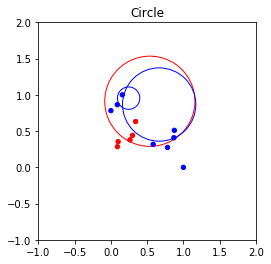

Layer ---------------
[0.5367995383416716, 0.9115833906162216] 0.6221585802922145 0
[0.24431912109056508, 0.9544585026021053] 0.15432601528112808 1
[0.6656533256589625, 0.8663602301628682] 0.5057726324435705 1
>epoch=0, lrate=0.100, error=12.090


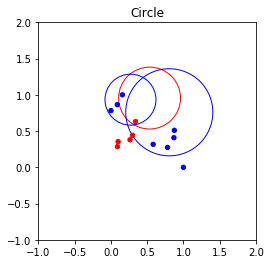

Layer ---------------
[0.5334097027339008, 0.9551846821390725] 0.4269985526428732 0
[0.2699306842376986, 0.9335725399235403] 0.3515766791485787 1
[0.8052269568542152, 0.7591219125671322] 0.6007418101498541 1
>epoch=1, lrate=0.100, error=10.125


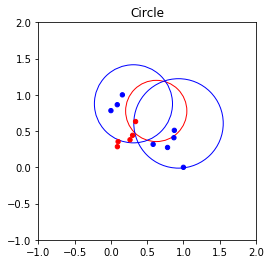

Layer ---------------
[0.6250972346693293, 0.7774996545408921] 0.4223695727310968 0
[0.31070459392855154, 0.8762433639471398] 0.5387954118394851 1
[0.932568433622951, 0.605750649188151] 0.6169097990134297 1
>epoch=2, lrate=0.100, error=9.783


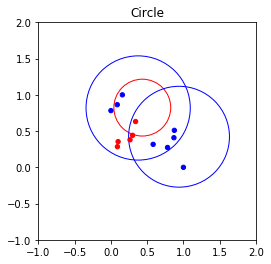

Layer ---------------
[0.43286694696299677, 0.8237221757865333] 0.39218687871553765 0
[0.3756057840557212, 0.8186998278368748] 0.7190080001123458 1
[0.9395839087669171, 0.42211269689374653] 0.6958267527408919 1
>epoch=3, lrate=0.100, error=9.568


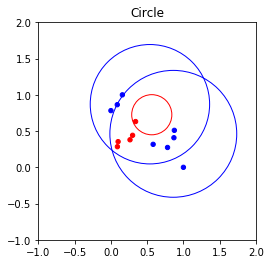

Layer ---------------
[0.5635051546043071, 0.7255985083300726] 0.2768378232830816 0
[0.5380148640597089, 0.8705175847063497] 0.8235939016730931 1
[0.8606156038597845, 0.4621311243212086] 0.8751659071002428 1
>epoch=4, lrate=0.100, error=9.481


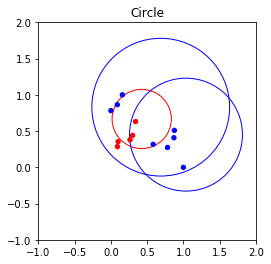

Layer ---------------
[0.4247937716913669, 0.6671630660866301] 0.4085361578974305 0
[0.6872749997960248, 0.829789301555652] 0.9503322890368794 1
[1.0356078120244707, 0.4509680016152585] 0.7789728108141838 1
>epoch=5, lrate=0.100, error=9.496


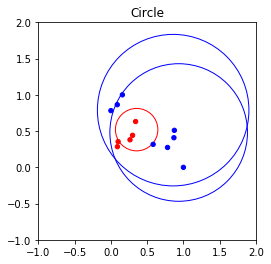

Layer ---------------
[0.35478341879840836, 0.519917865343515] 0.2927026508887798 0
[0.8584763459903919, 0.7888277557604813] 1.0452651644136772 1
[0.9347068962279561, 0.4804880230632596] 0.949112675411327 1
>epoch=6, lrate=0.100, error=9.184


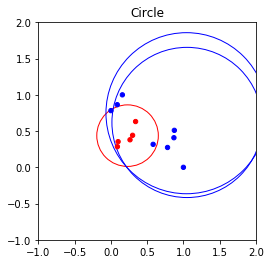

Layer ---------------
[0.22942881345413732, 0.4369577300093661] 0.4246262608466707 0
[1.0425419014487027, 0.7466369812458926] 1.1111423975043484 1
[1.04977610599863, 0.6190527074437049] 1.0360546399928814 1
>epoch=7, lrate=0.100, error=9.337


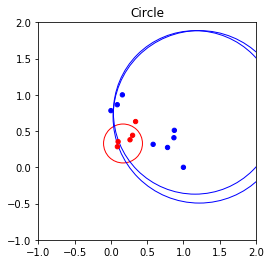

Layer ---------------
[0.1667030108059629, 0.32891295481255106] 0.26844751634277875 0
[1.219490879179783, 0.6966151287706325] 1.1897990790696737 1
[1.1615080597141996, 0.7573902737323587] 1.1275898150472512 1
>epoch=8, lrate=0.100, error=8.758


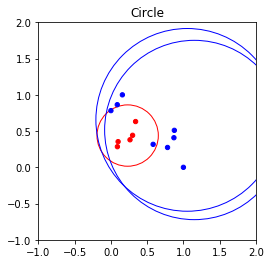

Layer ---------------
[0.2308188126334919, 0.43824137714101363] 0.42316163989710187 0
[1.1500799292070596, 0.5151040635994252] 1.2370838889381488 1
[1.0530355214965548, 0.6546289652858909] 1.2605327424220893 1
>epoch=9, lrate=0.100, error=9.335


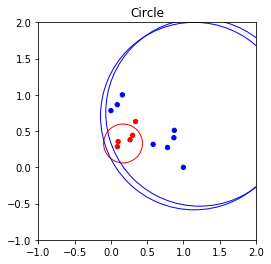

Layer ---------------
[0.16692683598244618, 0.32931456173444856] 0.2680721038058287 0
[1.1499603827008738, 0.7069878706607677] 1.293480611327649 1
[1.2216972337118872, 0.7571029111260384] 1.2929721822529938 1
>epoch=9, lrate=0.100, error=8.755


In [5]:
T = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1],
    [0.673756466,5.508563011,1],
    [1.373756466,6.108563011,1],
    [1.93756466,7.108563011,1] 
    ]

#seed(1966)

n_inputs = len(T[0]) - 1
network = SSNN_network()
# CASE 1:  network.init(n_inputs, [],['S','S'],[0,1])
network.init(n_inputs, [],['S','S','S'],[0,1,1])
#network = set_network_1(network)
#network.print_network_param()
network.train_network( T, 0.1, 10,10)